# Detection DAPI

## Les installations: 

In [ ]:
!pip install cellpose
!pip install numpy
!pip install matplotlib
!pip install pandas
# !pip uninstall torch
!conda install pytorch cudatoolkit=10.2 -c pytorch
!pip install --no-deps cellpose --upgrade

## Les imports:

In [ ]:
from tkinter import *
from tkinter.filedialog import askdirectory
from tkinter.filedialog import askopenfilename
import os
from math import sqrt
import re
import matplotlib.pyplot as plt
import glob 
import cv2 as cv # to open and view your image
import cellpose
from cellpose import utils, io, plot, models
from skimage.io import imread
from skimage import filters
import shutil

## Choose your path directory / Create a Result directory

In [ ]:
root = Tk()
root.withdraw()

# =============================================================================
#Choose your path directory
# =============================================================================
path = askdirectory(title='Select Working Folder (where your image are)') # shows dialog box and return the path
print(path)
os.chdir(path)

pathResult = path+'/SegmentationDAPI'
if not os.path.exists(pathResult):
    os.makedirs(pathResult)
print(pathResult)

# =============================================================================
#Display files in the folder
# =============================================================================

list = os.listdir(path)
for fichiers in list:
    print(fichiers)

## Run detection and segmentation

In [ ]:
# =============================================================================
# Run Cellpose
# =============================================================================

model = models.Cellpose(gpu=False, model_type='cyto')


Impath = glob.glob(path+"/*.tif")
for img in Impath:
    image = imread(img)
    imgs = cv.imread(img,0)
    
    imageS = image.shape
    
    if len(imageS) > 3:
        print("Ne pas prendre en compte"+img)
    else:
    
        channel3 = image[:,:,2]

        GB_imgs = filters.gaussian(channel3, 2)
       # define CHANNELS to run segementation on
       # grayscale=0, R=1, G=2, B=3
       # channels = [cytoplasm, nucleus]
       # if NUCLEUS channel does not exist, set the second channel to 0
        channels = [0,0]

        # if diameter is set to None, the size of the cells is estimated on a per image basis
        # you can set the average cell `diameter` in pixels yourself (recommended)
        # diameter can be a list or a single number for all images

        masks, flows, styles, diams = model.eval(GB_imgs, diameter=70, channels=channels)
    #     masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)


        fig = plt.figure(figsize=(12,5))
        plot.show_segmentation(fig, GB_imgs, masks,flows[0],channels=channels)
        plt.tight_layout()
        plt.show()

        # image_name is file name of image
        # masks is numpy array of masks for image
        base = os.path.splitext(img)[0]
    #     outlines = utils.outlines_list(masks)
    #     io.outlines_to_text(base, outlines)
        io.save_to_png(imgs, masks, flows, img)
    

# =============================================================================
# Moving png and txt to a result folder
# =============================================================================    

# Move .png
pngpath = glob.glob(path+"/*.png")
for files in pngpath:
    shutil.move(files,pathResult)

    
# Move .txt
txtpath = glob.glob(path+"/*.txt")
for files in txtpath:
    shutil.move(files,pathResult)


In [ ]:
import pandas as pd

#plt.imshow(n)
    #io.imshow(n)
Roi= glob.glob(pathResult+"/*.txt")
df= pd.DataFrame(columns=['Name','Value'])   
    #for file in Roi:
nRes = []
ImgName = []
for file in Roi:
    n = len(open(file).readlines())
    n=str(n)
    completeName = os.path.join(pathResult, "Result"+".txt")
    if not os.path.isfile(completeName):
        f = open(completeName,'w')
        f.close()
    name=os.path.basename(file) 
    fichier = open(completeName, "a")
    fichier.write('\n'+name+':'+n)
    fichier.close()
    nRes.append(n)
    ImgName.append(name)

print(nRes)
print(ImgName)

In [ ]:
!pip install napari_simpleitk_image_processing

In [ ]:
!pip install pyclesperanto-prototype

In [ ]:
# Importing Necessary Libraries
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from napari_simpleitk_image_processing import threshold_otsu, label_statistics
from skimage.filters import try_all_threshold, threshold_yen
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import skimage.io
from skimage import measure


Impath = glob.glob(path+"/*.tif")
for img in Impath:
    image = skimage.io.imread(img)
    imgs = cv.imread(img,0)
    
    imageS = image.shape
    
    if len(imageS) > 3:
        print("Ne pas prendre en compte"+img)
    else:
        channel1 = image[:,:,0]
        plt.figure(figsize=(12,5))
#         plt.imshow(channel1)
        
#         fig, axs = plt.subplots(1, 4, figsize=(15,15))
#         axs[0].imshow(channel1)
#         axs[1].imshow(bilateral_filter(channel1))
#         axs[2].imshow(white_top_hat(channel1))
#         axs[3].imshow(h_maxima(channel1, height=10))
        
#         fig, ax = try_all_threshold(channel1, figsize=(10, 8), verbose=False)

        thresh = threshold_yen(channel1)
#         plt.imshow(thresh)
        
        binary_mask = channel1 > thresh
#         fig, ax = plt.subplots(ncols=2, figsize=(8, 2.5))
#         ax[1].imshow(binary_mask, cmap='gray')
#         ax[0].imshow(channel1)
#         plt.show()
        
        # apply the binary mask to select the foreground
#         selection = np.zeros_like(image)
#         selection[binary_mask] = image[binary_mask]

#         fig, ax = plt.subplots()
#         plt.imshow(selection)
#         plt.show()
        
        from skimage.measure import label
        labeled_channel1 = label(binary_mask)
        label_image = measure.label(binary_mask)
        
#         Visualization
#         fig, axs = plt.subplots(1, 3, figsize=(15,15))

#         axs[0].imshow(channel1)
#         axs[1].imshow(binary_mask)
#         axs[2].imshow(labeled_channel1)
#         imshow(label_image, labels = True)
        print(label_image)

(512, 512, 3)


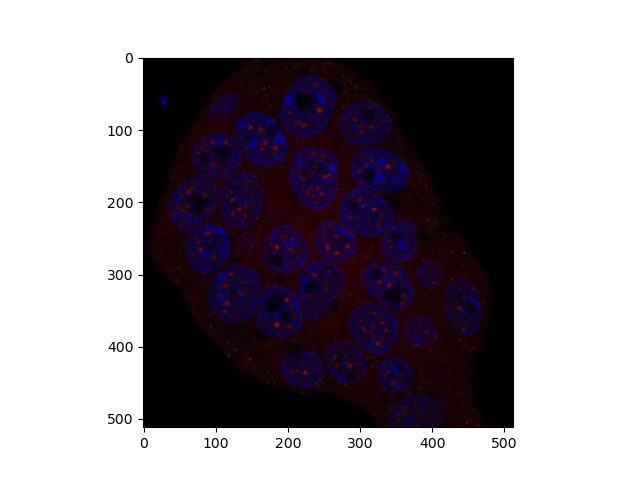

In [21]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
%matplotlib widget

# load the image
image = skimage.io.imread("C:/Users/silvinm/Desktop/Faezeh_Detection_noyaux_measure_intensity/DAPI/Auxin_1.tif")
print(image.shape)
fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

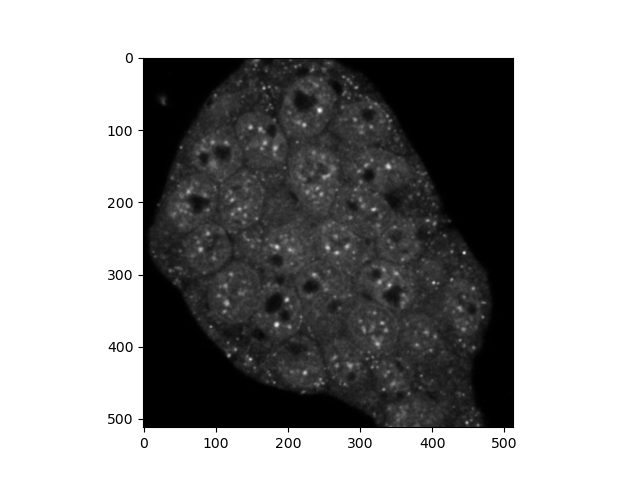

In [8]:
# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap='gray')
plt.show()

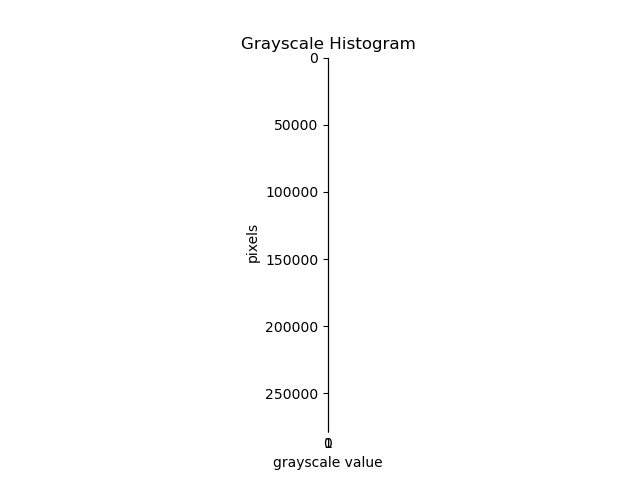

In [11]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 100.0))

plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

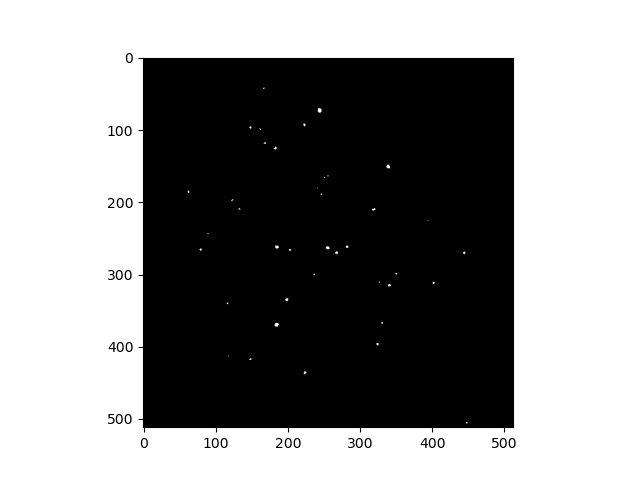

In [31]:
from napari_simpleitk_image_processing import threshold_otsu, label_statistics
from skimage.filters import try_all_threshold, threshold_yen

# create a mask based on the threshold
thresh = threshold_yen(gray_image)
binary_mask = blurred_image > thresh

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.show()

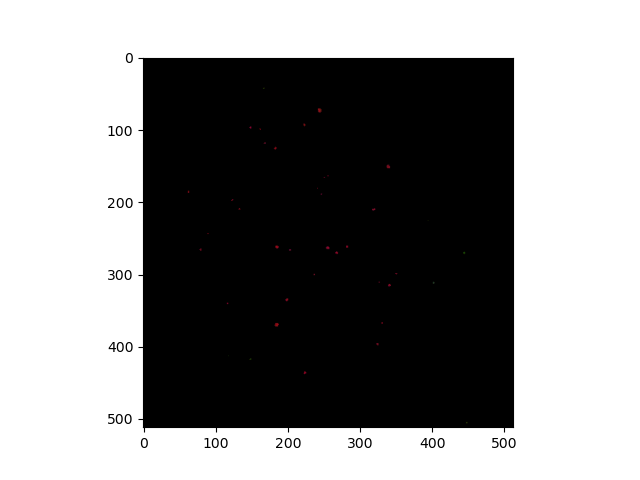

In [32]:
# use the binary_mask to select the "interesting" part of the image
selection = np.zeros_like(image)
selection[binary_mask] = image[binary_mask]

fig, ax = plt.subplots()
plt.imshow(selection)
plt.show()

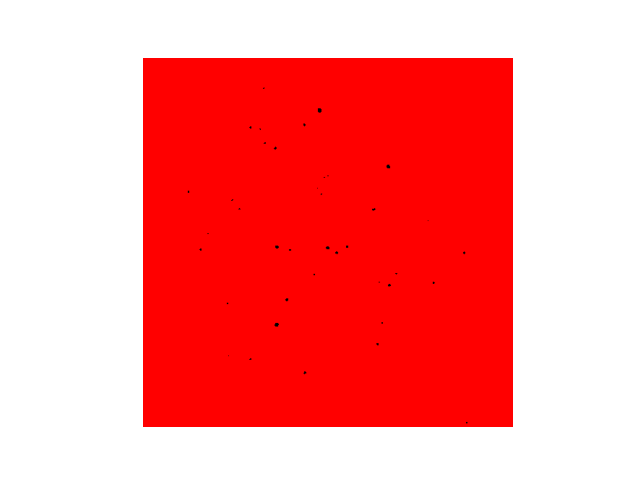

In [33]:
# convert the label image to color image
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)

fig, ax = plt.subplots()
plt.imshow(colored_label_image)
plt.axis('off')
plt.show()

In [54]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np

# # label_image = measure.label(edge_touching_removed, connectivity=image.ndim)
# all_props=measure.regionprops(labeled_image, image)
# #Can print various parameters for all objects
# for prop in all_props:
#     print('Label: {} Area: {}'.format(prop.label, prop.area))

In [55]:
#Compute image properties and return them as a pandas-compatible table.
#Available regionprops: area, bbox, centroid, convex_area, coords, eccentricity,
# equivalent diameter, euler number, label, intensity image, major axis length, 
#max intensity, mean intensity, moments, orientation, perimeter, solidity, and many more

props = measure.regionprops_table(labeled_image, image, 
                          properties=['label','mean_intensity'])

import pandas as pd
df = pd.DataFrame(props)
# print(df.head())
df.drop('mean_intensity-1', inplace=True, axis=1) #where 1 is the axis number (0 for rows and 1 for columns.)
df.drop('mean_intensity-2', inplace=True, axis=1)
print(df)


    label  mean_intensity-0
0       1         38.000000
1       2        109.592593
2       3        101.000000
3       4        118.285714
4       5        121.666667
5       6         93.600000
6       7        114.800000
7       8        106.523810
8       9        128.000000
9      10         98.500000
10     11        146.000000
11     12        114.000000
12     13        100.666667
13     14        125.500000
14     15        131.250000
15     16        111.545455
16     17         34.000000
17     18        118.000000
18     19        121.352941
19     20        115.777778
20     21        111.176471
21     22        105.285714
22     23         92.166667
23     24        120.181818
24     25         25.000000
25     26        114.250000
26     27         99.250000
27     28        125.000000
28     29         32.000000
29     30        120.272727
30     31        117.076923
31     32        116.000000
32     33        119.250000
33     34        123.333333
34     35        109

In [47]:
#save to csv
df.to_csv('C:/Users/silvinm/Desktop/Faezeh_Detection_noyaux_measure_intensity/DAPI/Auxin_1_measurements.csv')